# Characteristics of INTS11-bound (eclip) and AGO2-bound (RIP) miRNAs

In [1]:
rm(list=ls())
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
options(stringsAsFactors = FALSE)


In [2]:
library(dplyr)
library(ggplot2)
library(cowplot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [4]:
# eclip data
ints11_r1 <- read.delim("bamtobed_files/eclip_hela_ip_ints11_r1.umi.r1.fq.genome-mappedSoSo.rmDupSo_mirna.txt", header=F)
colnames(ints11_r1)[4] <- "miRNA"
ints11_r2 <- read.delim("bamtobed_files/eclip_hela_ip_ints11_r2.umi.r1.fq.genome-mappedSoSo.rmDupSo_mirna.txt", header=F)
colnames(ints11_r2)[4] <- "miRNA"

inp_r1 <- read.delim("bamtobed_files/eclip_hela_input_ints11_r1.umi.r1.fq.genome-mappedSoSo.rmDupSo_mirna.txt", header=F)
colnames(inp_r1)[4] <- "miRNA"
inp_r2 <- read.delim("bamtobed_files/eclip_hela_input_ints11_r2.umi.r1.fq.genome-mappedSoSo.rmDupSo_mirna.txt", header=F)
colnames(inp_r2)[4] <- "miRNA"

cpsf73_r1 <- read.delim("bamtobed_files/eclip_hela_ip_cpsf73_r1.umi.r1.fq.genome-mappedSoSo.rmDupSo_mirna.txt", header=F)
colnames(cpsf73_r1)[4] <- "miRNA"
cpsf73_r2 <- read.delim("bamtobed_files/eclip_hela_ip_cpsf73_r2.umi.r1.fq.genome-mappedSoSo.rmDupSo_mirna.txt", header=F)
colnames(cpsf73_r2)[4] <- "miRNA"

igg_r1 <- read.delim("bamtobed_files/eclip_hela_ip_igg_r1.umi.r1.fq.genome-mappedSoSo.rmDupSo_mirna.txt", header=F)
colnames(igg_r1)[4] <- "miRNA"
igg_r2 <- read.delim("bamtobed_files/eclip_hela_ip_igg_r2.umi.r1.fq.genome-mappedSoSo.rmDupSo_mirna.txt", header=F)
colnames(igg_r2)[4] <- "miRNA"

ints11 <- rbind.data.frame(ints11_r1, ints11_r2)
input <- rbind.data.frame(inp_r1, inp_r2)
cpsf73 <- rbind.data.frame(cpsf73_r1, cpsf73_r2)
igg <- rbind.data.frame(igg_r1, igg_r2)

In [5]:
# ago2 rip

ago2_r1 <- read.delim("bamtobed_files/rip_ago2_shgfp_24h_noS4U_r1_cut_rmSpike_hg19_3mm_sorted_mirna.txt", header=F)
colnames(ago2_r1)[4] <- "miRNA"

ago2_r2 <- read.delim("bamtobed_files/rip_ago2_shgfp_24h_noS4U_r2_cut_rmSpike_hg19_3mm_sorted_mirna.txt", header=F)
colnames(ago2_r2)[4] <- "miRNA"

ago2 <- rbind.data.frame(ago2_r1, ago2_r2)

In [7]:
head(ints11)
nrow(ints11)

length(unique(ints11$miRNA))
length(unique(input$miRNA))
length(unique(cpsf73$miRNA))
length(unique(igg$miRNA))
length(unique(ago2$miRNA))

,V1,V2,V3,miRNA,V5,V6,V7,V8,V9,V10,V11,V12,V13
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr22,46508631,46508653,hsa-let-7a-5p,.,+,chr22,46508630,46508653,A00773:105:HVC5NDRXX:1:1274:19153:6261_GCCCCCATGG,255,+,22
2,chr22,46508631,46508653,hsa-let-7a-5p,.,+,chr22,46508634,46508656,A00773:105:HVC5NDRXX:1:1252:12075:11663_ACCTACCAGT,255,+,19
3,chr22,46509624,46509646,hsa-let-7b-3p,.,+,chr22,46509622,46509645,A00773:105:HVC5NDRXX:1:1231:25482:17065_GTAGGTTGGT,255,+,21
4,chr22,46509570,46509592,hsa-let-7b-5p,.,+,chr22,46509570,46509592,A00773:105:HVC5NDRXX:1:2254:17354:19335_ACCCACCCAA,255,+,22
5,chr22,46509570,46509592,hsa-let-7b-5p,.,+,chr22,46509570,46509592,A00773:105:HVC5NDRXX:1:2161:15890:6715_AGACCACACT,255,+,22
6,chr22,46509570,46509592,hsa-let-7b-5p,.,+,chr22,46509570,46509592,A00773:105:HVC5NDRXX:1:2259:17011:4711_ACACCCCTTT,255,+,22


[1] 3358

[1] 134

[1] 47

[1] 44

[1] 24

[1] 229

# Calculate miRNA RPM 


In [9]:
# perform rpm normalization manually:

ints11.reads <- 110641+129900 
input.reads <- 129900+174557 
cpsf73.reads <- 53290+255043 
igg.reads <- 59257+73794 
ago2.reads <- 4521723+4425345 # number of input reads after spike removal

In [10]:
# make sure I am looking at the same 205 miRNAs
to5 <- read.delim("205_miRNA_RPM_shControl.csv") # shControl samples from Supplementary table
to5$miRNA <- rownames(to5)
to5 <- to5[,c(3,4)]
colnames(to5)[1] <- "rpm.shControl"

head(to5)

,rpm.shControl,miRNA
,<dbl>,<chr>
hsa-let-7a-5p,1503.250,hsa-let-7a-5p
hsa-let-7a-3p,10.200,hsa-let-7a-3p
hsa-let-7b-5p,524.050,hsa-let-7b-5p
hsa-let-7b-3p,4.350,hsa-let-7b-3p
hsa-let-7c-5p,189.980,hsa-let-7c-5p
hsa-let-7d-5p,297.585,hsa-let-7d-5p


In [11]:
ints11.rpm <- ints11 %>%
    group_by(miRNA) %>%
    count(miRNA) %>%
    mutate(rpm = n/(ints11.reads)*1E06) %>%
    filter(rpm > 10) %>% # chose rpm eclip cutoff > 10 rpm --> >= 3 reads
    left_join(to5) %>%
    mutate(sample="INTS11") %>%
    arrange(desc(rpm)) %>% 
    filter(complete.cases(rpm.shControl))

input.rpm <- input %>%
    group_by(miRNA) %>%
    count(miRNA) %>%
    mutate(rpm = n/(input.reads)*1E06) %>%
    filter(rpm > 10) %>% # chose rpm eclip cutoff > 10 rpm --> >= 3 reads
    left_join(to5) %>%
    mutate(sample="input_INTS11") %>%
    arrange(desc(rpm)) %>% 
    filter(complete.cases(rpm.shControl))

cpsf73.rpm <- cpsf73 %>%
    group_by(miRNA) %>%
    count(miRNA) %>%
    mutate(rpm = n/(cpsf73.reads)*1E06) %>%
    filter(rpm > 10) %>% # chose rpm eclip cutoff > 10 rpm --> >= 3 reads
    left_join(to5) %>%
    mutate(sample="CPSF73") %>%
    arrange(desc(rpm)) %>% 
    filter(complete.cases(rpm.shControl))

igg.rpm <- igg %>%
    group_by(miRNA) %>%
    count(miRNA) %>%
    mutate(rpm = n/(igg.reads)*1E06) %>%
    filter(rpm > 10) %>% # chose rpm eclip cutoff > 10 rpm --> >= 3 reads
    left_join(to5) %>%
    mutate(sample="IgG") %>%
    arrange(desc(rpm)) %>% 
    filter(complete.cases(rpm.shControl))

ago2.rpm <- ago2 %>%
    group_by(miRNA) %>%
    count(miRNA) %>%
    mutate(rpm = n/(ago2.reads)*1E06) %>%
    filter(rpm > 10) %>% # doesn't make a difference, all present miRNAs have higher values anyways
    left_join(to5) %>%
    mutate(sample="Ago2") %>%
    arrange(desc(rpm)) %>% 
    filter(complete.cases(rpm.shControl))


all <- rbind.data.frame(ints11.rpm, input.rpm, cpsf73.rpm, igg.rpm, ago2.rpm)
head(all)


Joining, by = "miRNA"

Joining, by = "miRNA"

Joining, by = "miRNA"

Joining, by = "miRNA"

Joining, by = "miRNA"



miRNA,n,rpm,rpm.shControl,sample
<chr>,<int>,<dbl>,<dbl>,<chr>
hsa-miR-27a-3p,1014,4215.4976,29.785,INTS11
hsa-miR-23a-3p,394,1637.9744,925.265,INTS11
hsa-miR-21-5p,343,1425.9523,102.350,INTS11
hsa-let-7i-5p,82,340.8982,273.850,INTS11
hsa-let-7b-5p,64,266.0669,524.050,INTS11
hsa-miR-186-5p,58,241.1231,13.000,INTS11


In [12]:
#head(ints11.rpm)
#tail(ints11.rpm)
nrow(ints11.rpm)

#head(input.rpm)
#tail(input.rpm)
nrow(input.rpm)

#head(cpsf73.rpm)
#tail(cpsf73.rpm)
nrow(cpsf73.rpm)

#head(igg.rpm)
#tail(igg.rpm)
nrow(igg.rpm)

#head(ago2.rpm)
#tail(ago2.rpm)
nrow(ago2.rpm)

[1] 90

[1] 8

[1] 11

[1] 4

[1] 146

## separate into quartiles according shControl RPM

In [13]:
# separate into quartiles

to5 <- to5 %>%  
    mutate(quartile = ntile(rpm.shControl, 3)) 

to5$quartile <- gsub(1, "low", to5$quartile)
to5$quartile <- gsub(2, "mid", to5$quartile)
to5$quartile <- gsub(3, "high", to5$quartile)
head(to5)
nrow(to5)

,rpm.shControl,miRNA,quartile
,<dbl>,<chr>,<chr>
1,1503.250,hsa-let-7a-5p,high
2,10.200,hsa-let-7a-3p,mid
3,524.050,hsa-let-7b-5p,high
4,4.350,hsa-let-7b-3p,mid
5,189.980,hsa-let-7c-5p,high
6,297.585,hsa-let-7d-5p,high


[1] 205

In [14]:
nrow(to5[to5$quartile=="low",])
nrow(to5[to5$quartile=="mid",])
nrow(to5[to5$quartile=="high",])

[1] 69

[1] 68

[1] 68

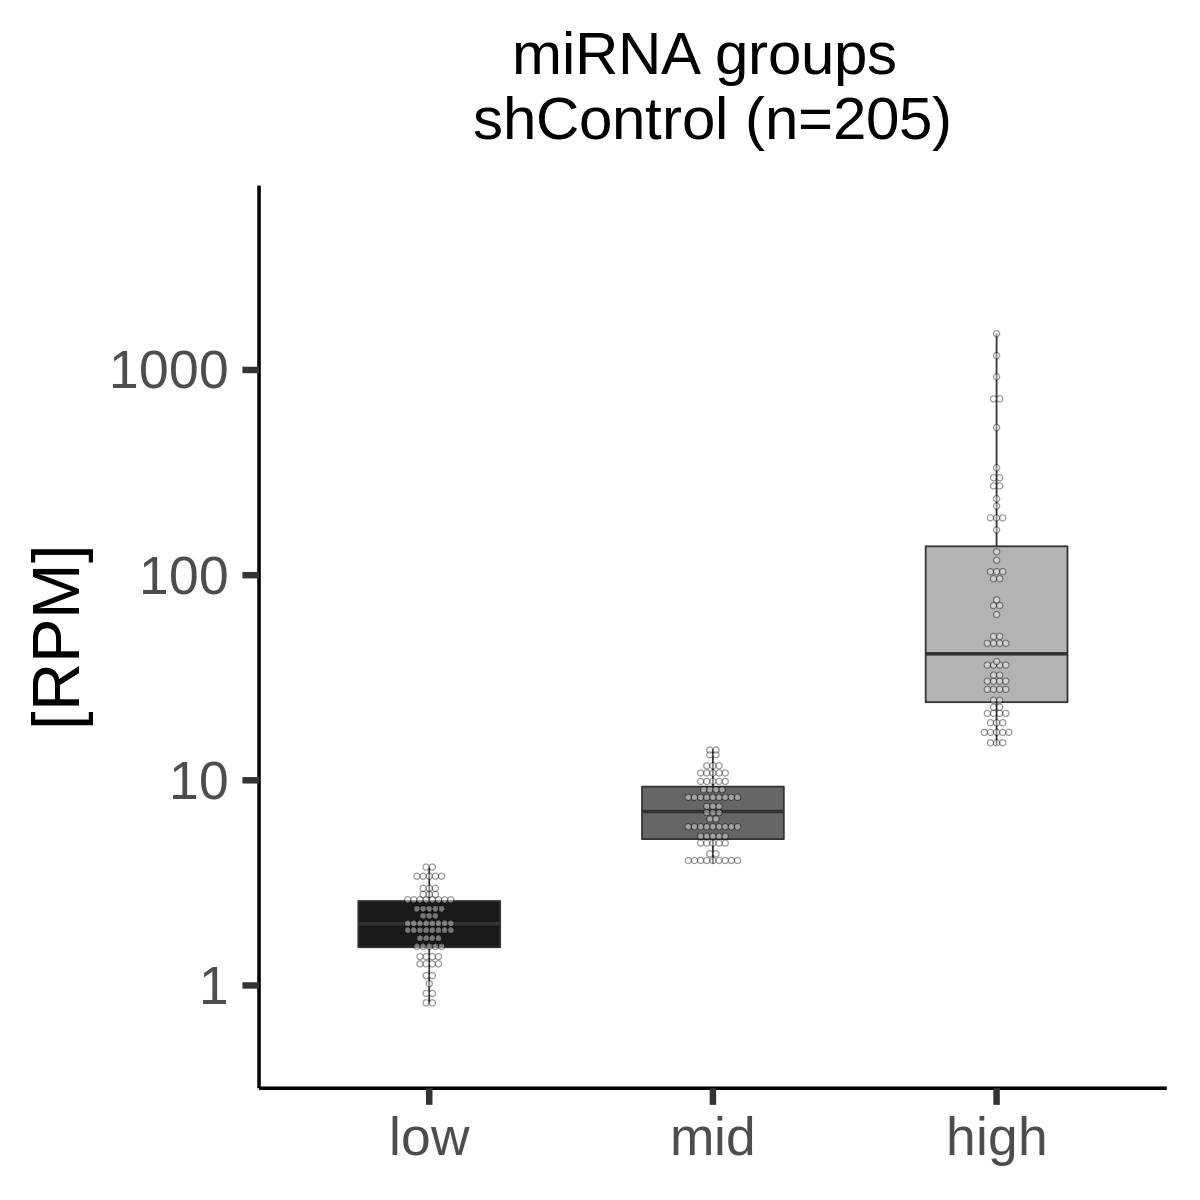

In [15]:
options(repr.plot.width=10, repr.plot.height=10)

plot.control <- ggplot(data = to5, aes(x = quartile, y = rpm.shControl)) +
        theme_bw(base_size = 40) +
        ggtitle("miRNA groups \nshControl (n=205)") +
        theme(plot.title = element_text(hjust = 0.5, size=36)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank(),
              legend.position = "none") +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text())+ #angle = 45, hjust = 1)) +
        scale_y_continuous(name="[RPM]", trans = "log10", limits=c(0.5, 5000))+#, breaks =seq(from =-8, to=3,by=1)) +
        scale_x_discrete(limits=c("low", "mid", "high")) +
        #geom_violin(alpha=0.2) +
        geom_boxplot(aes(fill=quartile),width = 0.5, outlier.color=NA) +
        geom_dotplot(binaxis="y", stackdir = "center", binwidth = .03, alpha=.4, fill="white") +
        #geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun=mean, geom="point", size = 3, color="red") +
        scale_fill_manual(values=c("grey70", "grey10", "grey40")) # limits orders colors as wanted!!! very useful!

plot.control
#ggsave(paste0(target.dir, "/boxplot_deseq2_ALL.pdf"),  width=16, height=10)

In [16]:
# Compute the analysis of variance
res.aov <- aov(rpm.shControl ~ quartile, data = to5)
# Summary of the analysis
summary(res.aov) 


TukeyHSD(res.aov)

             Df  Sum Sq Mean Sq F value   Pr(>F)    
quartile      2  999814  499907   20.04 1.15e-08 ***
Residuals   202 5039211   24947                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rpm.shControl ~ quartile, data = to5)

$quartile
                diff        lwr       upr     p adj
low-high -150.944588 -214.66887 -87.22030 0.0000002
mid-high -145.521471 -209.47790 -81.56504 0.0000006
mid-low     5.423117  -58.30117  69.14740 0.9779897


## Ago2 RIP

In [22]:
head(ago2.rpm)

ago2.rpm <- ago2.rpm %>%
    left_join(to5)

head(ago2.rpm)
nrow(ago2.rpm)

miRNA,n,rpm,rpm.shControl,sample
<chr>,<int>,<dbl>,<dbl>,<chr>
hsa-miR-23a-3p,79216,8853.850,925.265,Ago2
hsa-miR-25-3p,51465,5752.164,713.900,Ago2
hsa-let-7b-5p,27618,3086.821,524.050,Ago2
hsa-miR-191-5p,23282,2602.193,299.485,Ago2
hsa-miR-21-5p,20406,2280.747,102.350,Ago2
hsa-miR-93-5p,14425,1612.260,217.100,Ago2


Joining, by = c("miRNA", "rpm.shControl")



miRNA,n,rpm,rpm.shControl,sample,quartile
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>
hsa-miR-23a-3p,79216,8853.850,925.265,Ago2,high
hsa-miR-25-3p,51465,5752.164,713.900,Ago2,high
hsa-let-7b-5p,27618,3086.821,524.050,Ago2,high
hsa-miR-191-5p,23282,2602.193,299.485,Ago2,high
hsa-miR-21-5p,20406,2280.747,102.350,Ago2,high
hsa-miR-93-5p,14425,1612.260,217.100,Ago2,high


[1] 146

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_bindot).”


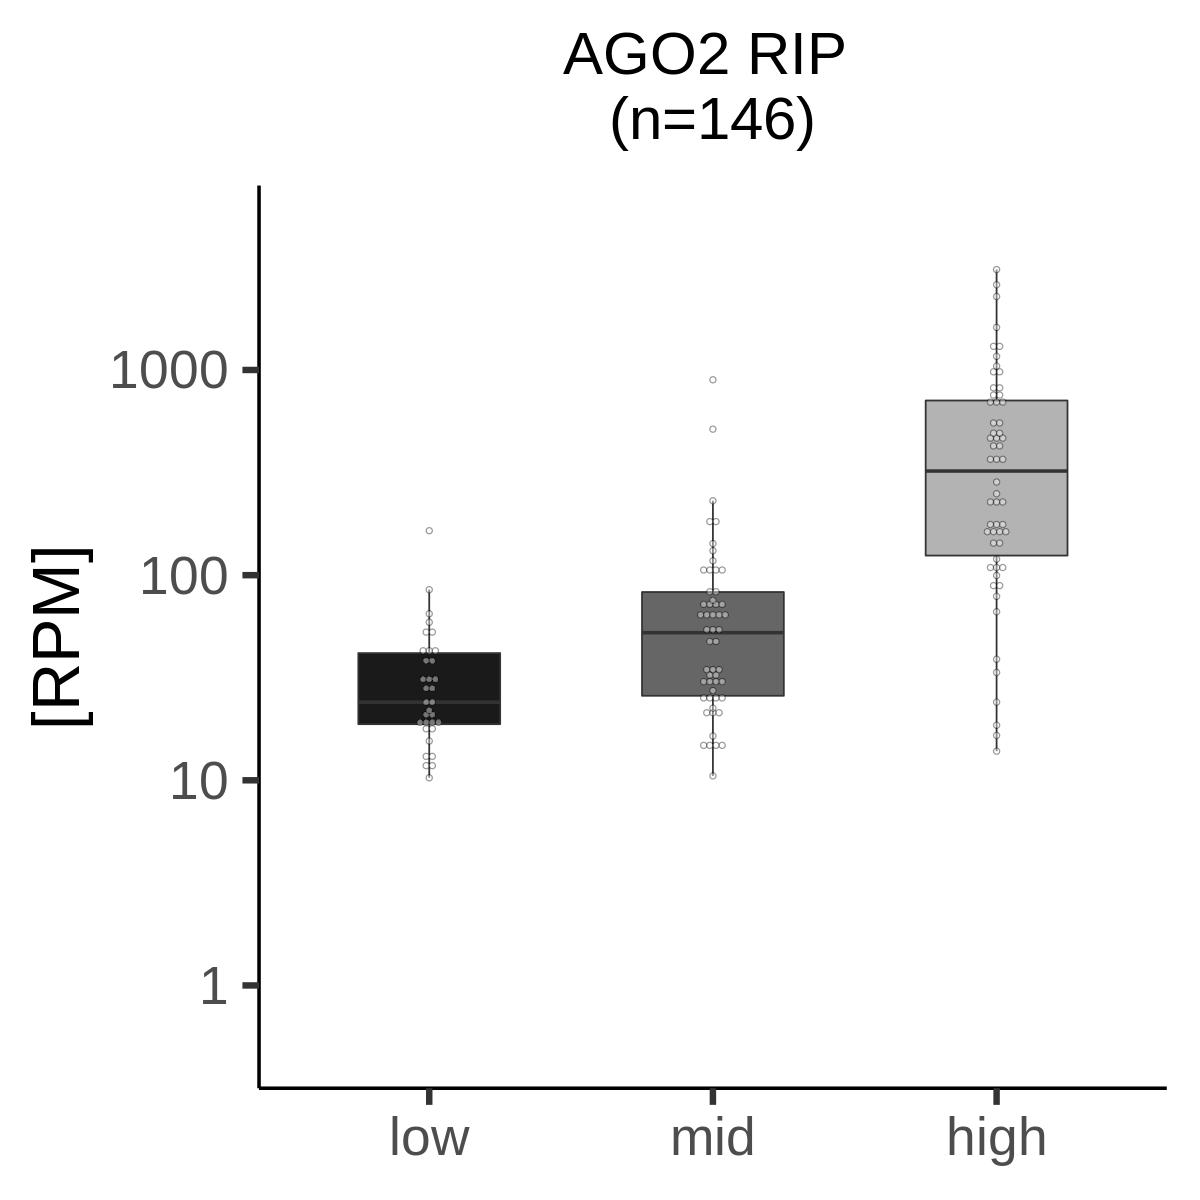

In [23]:
options(repr.plot.width=10, repr.plot.height=10)

plot.ago <- ggplot(data = ago2.rpm, aes(x = quartile, y = rpm)) +
        theme_bw(base_size = 40) +
        ggtitle("AGO2 RIP \n(n=146)") +
        theme(plot.title = element_text(hjust = 0.5, size=36)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank(),
              legend.position = "none") +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text())+ #angle = 45, hjust = 1)) +
        scale_y_continuous(name="[RPM]", trans = "log10", limits=c(0.5,5000))+#, breaks =seq(from =-8, to=3,by=1)) +
        scale_x_discrete(limits=c("low", "mid", "high")) +
        #geom_violin(alpha=0.2) +
        geom_boxplot(aes(fill=quartile),width = 0.5, outlier.color=NA) +
        geom_dotplot(binaxis="y", stackdir = "center", binwidth = .03, alpha=.4, fill="white") +
        #geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun=mean, geom="point", size = 3, color="red") +
        scale_fill_manual(values=c("grey70", "grey10", "grey40")) # limits orders colors as wanted!!! very useful!

plot.ago
#ggsave(paste0(target.dir, "/boxplot_deseq2_ALL.pdf"),  width=16, height=10)

In [24]:
# Compute the analysis of variance
res.aov <- aov(rpm ~ quartile, data = ago2.rpm)
# Summary of the analysis
summary(res.aov) 


TukeyHSD(res.aov)

             Df    Sum Sq Mean Sq F value  Pr(>F)    
quartile      2  16885494 8442747    10.3 6.6e-05 ***
Residuals   143 117174892  819405                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rpm ~ quartile, data = ago2.rpm)

$quartile
               diff       lwr       upr     p adj
low-high -721.51146 -1186.142 -256.8809 0.0009640
mid-high -670.58601 -1074.719 -266.4528 0.0003859
mid-low    50.92545  -424.468  526.3189 0.9651482


## INTS11 eCLIP

In [26]:
head(ints11.rpm)

ints11.rpm <- ints11.rpm %>%
    left_join(to5)

head(ints11.rpm)
nrow(ints11.rpm)

miRNA,n,rpm,rpm.shControl,sample,quartile
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>
hsa-miR-27a-3p,1014,4215.4976,29.785,INTS11,high
hsa-miR-23a-3p,394,1637.9744,925.265,INTS11,high
hsa-miR-21-5p,343,1425.9523,102.350,INTS11,high
hsa-let-7i-5p,82,340.8982,273.850,INTS11,high
hsa-let-7b-5p,64,266.0669,524.050,INTS11,high
hsa-miR-186-5p,58,241.1231,13.000,INTS11,mid


Joining, by = c("miRNA", "rpm.shControl", "quartile")



miRNA,n,rpm,rpm.shControl,sample,quartile
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>
hsa-miR-27a-3p,1014,4215.4976,29.785,INTS11,high
hsa-miR-23a-3p,394,1637.9744,925.265,INTS11,high
hsa-miR-21-5p,343,1425.9523,102.350,INTS11,high
hsa-let-7i-5p,82,340.8982,273.850,INTS11,high
hsa-let-7b-5p,64,266.0669,524.050,INTS11,high
hsa-miR-186-5p,58,241.1231,13.000,INTS11,mid


[1] 90

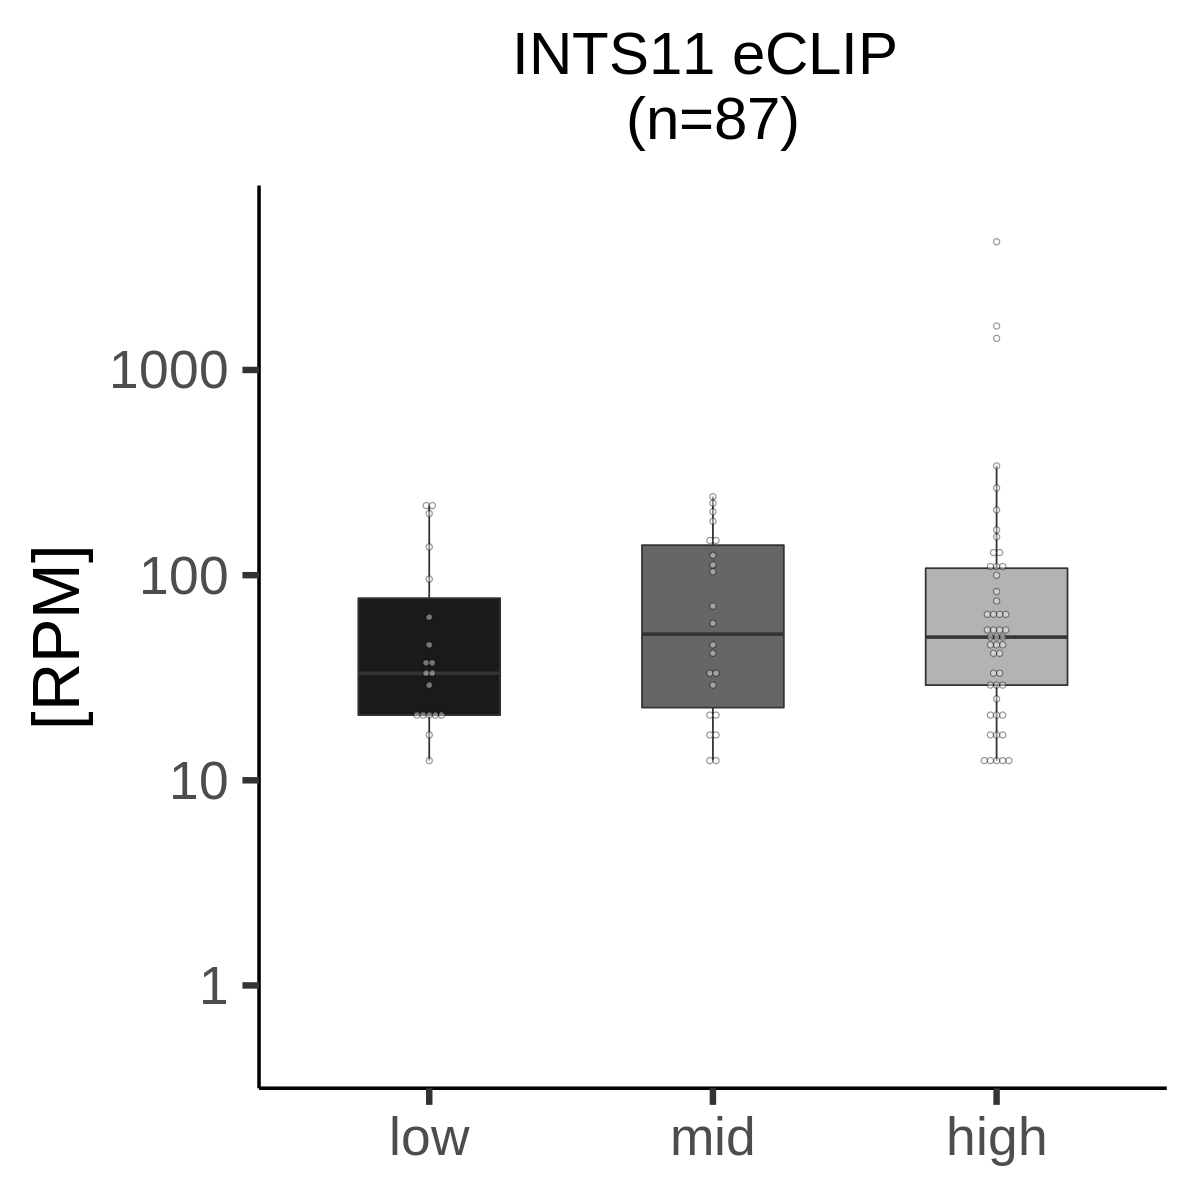

In [27]:
options(repr.plot.width=10, repr.plot.height=10)

plot.eclip <- ggplot(data = ints11.rpm, aes(x = quartile, y = rpm)) +
        theme_bw(base_size = 40) +
        ggtitle("INTS11 eCLIP \n(n=87)") +
        theme(plot.title = element_text(hjust = 0.5, size=36)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank(),
              legend.position = "none") +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text())+ #angle = 45, hjust = 1)) +
        scale_y_continuous(name="[RPM]", trans = "log10", limits=c(0.5,5000))+#, breaks =seq(from =-8, to=3,by=1)) +
        scale_x_discrete(limits=c("low", "mid", "high")) +
        #geom_violin(alpha=0.2) +
        geom_boxplot(aes(fill=quartile),width = 0.5, outlier.color=NA) +
        geom_dotplot(binaxis="y", stackdir = "center", binwidth = .03, alpha=.4, fill="white") +
        #geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun=mean, geom="point", size = 3, color="red") +
        scale_fill_manual(values=c("grey70", "grey10", "grey40")) # limits orders colors as wanted!!! very useful!

plot.eclip
#ggsave(paste0(target.dir, "/boxplot_deseq2_ALL.pdf"),  width=16, height=10)

In [28]:
# Compute the analysis of variance
res.aov <- aov(rpm ~ quartile, data = ints11.rpm)
# Summary of the analysis
summary(res.aov) 


TukeyHSD(res.aov)

            Df   Sum Sq Mean Sq F value Pr(>F)
quartile     2   415390  207695   0.865  0.425
Residuals   87 20892851  240148               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rpm ~ quartile, data = ints11.rpm)

$quartile
               diff       lwr      upr     p adj
low-high -145.98760 -461.7878 169.8126 0.5152482
mid-high -127.02119 -426.9047 172.8624 0.5725804
mid-low    18.96642 -346.9961 384.9290 0.9916168


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_bindot).”


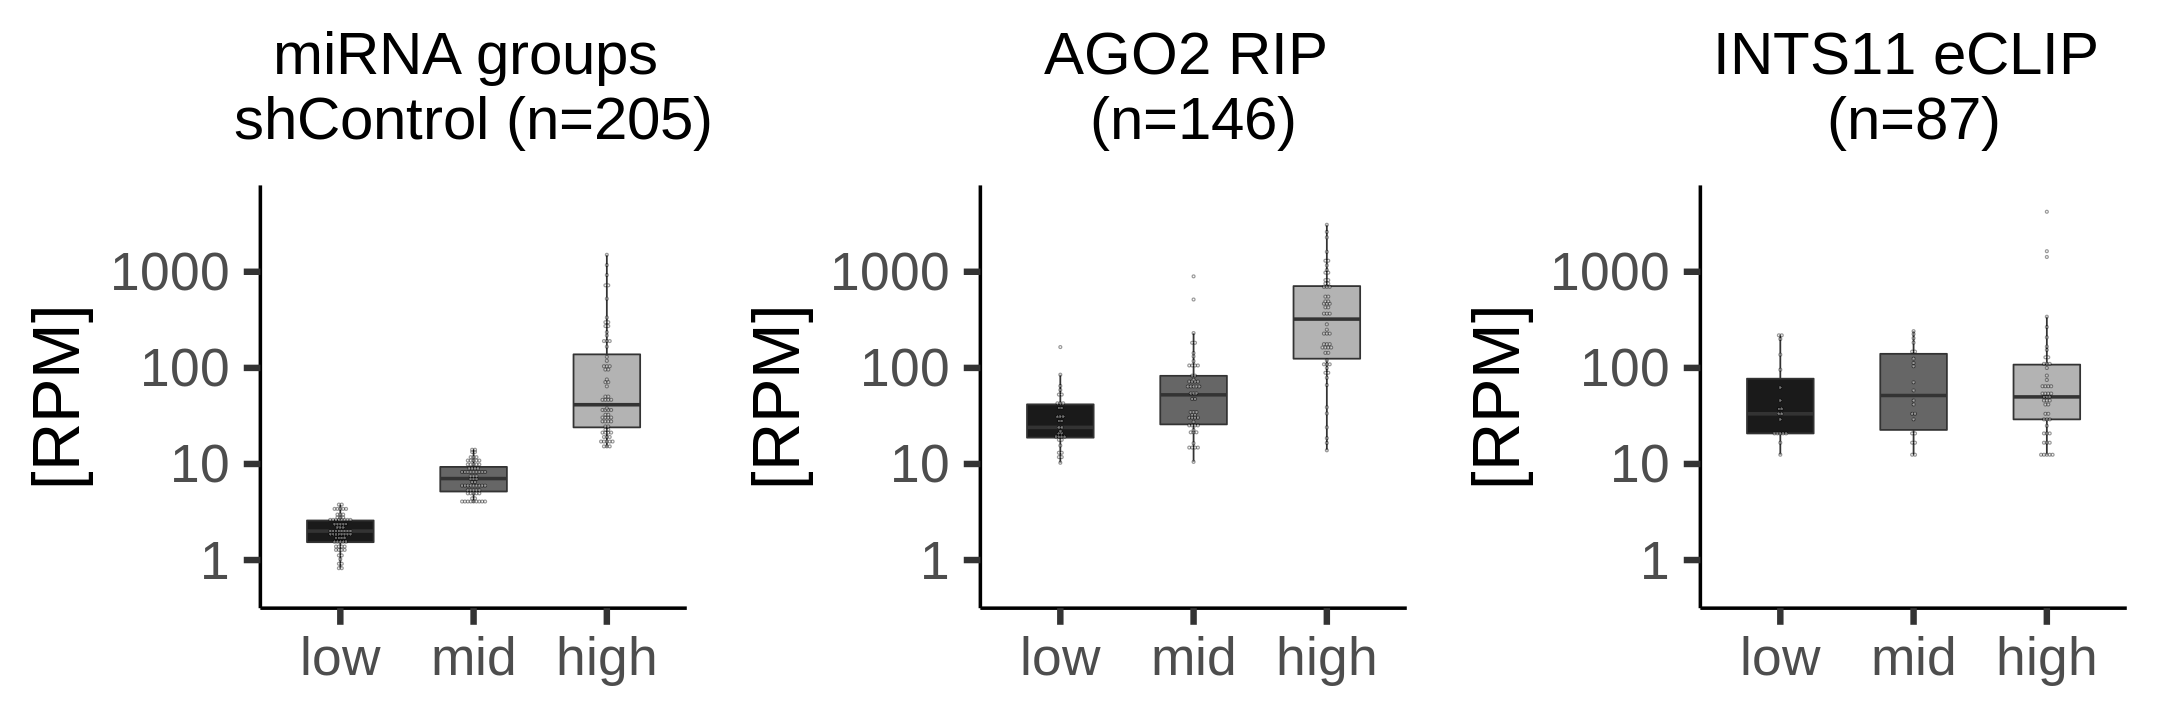

In [29]:
options(repr.plot.width=18, repr.plot.height=6)
plot_grid(plot.control, plot.ago, plot.eclip, ncol=3, rel_widths =c(1,1))
#ggsave("boxplot_eclip_mirna_quantiles_rpm.pdf",  width=18, height=6)

# use the same set of 87 miRNAs for analysis

In [30]:
eclip.87 <- ints11.rpm$miRNA
#eclip.87

[1] "hsa-miR-27a-3p"  "hsa-miR-23a-3p"  "hsa-miR-21-5p"   "hsa-let-7i-5p"  
 [5] "hsa-let-7b-5p"   "hsa-miR-186-5p"  "hsa-miR-20a-5p"  "hsa-miR-18a-5p" 
 [9] "hsa-miR-675-3p"  "hsa-miR-222-3p"  "hsa-miR-99a-5p"  "hsa-miR-330-5p" 
[13] "hsa-miR-18a-3p"  "hsa-miR-17-5p"   "hsa-miR-324-5p"  "hsa-miR-27b-3p" 
[17] "hsa-miR-193b-3p" "hsa-miR-93-3p"   "hsa-miR-224-5p"  "hsa-miR-31-5p"  
[21] "hsa-miR-484"     "hsa-miR-148b-3p" "hsa-miR-29a-3p"  "hsa-miR-151a-3p"
[25] "hsa-miR-455-3p"  "hsa-miR-17-3p"   "hsa-miR-15b-3p"  "hsa-miR-106b-5p"
[29] "hsa-miR-19a-3p"  "hsa-miR-30a-3p"  "hsa-miR-15b-5p"  "hsa-miR-106b-3p"
[33] "hsa-miR-221-3p"  "hsa-miR-30b-5p"  "hsa-miR-92b-3p"  "hsa-miR-98-5p"  
[37] "hsa-miR-324-3p"  "hsa-let-7c-5p"   "hsa-let-7d-3p"   "hsa-let-7g-5p"  
[41] "hsa-miR-675-5p"  "hsa-let-7d-5p"   "hsa-miR-423-3p"  "hsa-miR-93-5p"  
[45] "hsa-miR-10a-5p"  "hsa-miR-125a-5p" "hsa-miR-149-5p"  "hsa-miR-23b-3p" 
[49] "hsa-miR-425-5p"  "hsa-miR-326"     "hsa-miR-331-3p"  "hsa-miR-454-3p" 
[53] "hsa-miR-29c-3p"  "hsa-miR-328-3p"  "hsa-let-7e-5p"   "hsa-miR-20a-3p" 
[57] "hsa-miR-28-5p"   "hsa-miR-31-3p"   "hsa-miR-424-5p"  "hsa-miR-452-5p" 
[61] "hsa-miR-126-3p"  "hsa-miR-16-5p"   "hsa-miR-181b-5p" "hsa-miR-374a-5p"
[65] "hsa-miR-99b-5p"  "hsa-miR-1307-3p" "hsa-let-7a-5p"   "hsa-let-7i-3p"  
[69] "hsa-miR-100-5p"  "hsa-miR-1304-3p" "hsa-miR-196b-5p" "hsa-miR-296-5p" 
[73] "hsa-miR-340-3p"  "hsa-miR-4521"    "hsa-miR-505-3p"  "hsa-miR-744-5p" 
[77] "hsa-let-7f-5p"   "hsa-miR-128-3p"  "hsa-miR-301a-3p" "hsa-miR-30e-3p" 
[81] "hsa-miR-877-5p"  "hsa-miR-92a-3p"  "hsa-let-7f-1-3p" "hsa-miR-103a-3p"
[85] "hsa-miR-183-5p"  "hsa-miR-190a-5p" "hsa-miR-25-3p"   "hsa-miR-27a-5p" 
[89] "hsa-miR-34a-5p"  "hsa-miR-374b-5p"

In [31]:
#nrow(to5)
gfp.87 <- to5[to5$miRNA %in% eclip.87,]
head(gfp.87)
nrow(gfp.87)

#head(ago2.rpm)
#nrow(ago2.rpm)
ago2.87 <- ago2.rpm[ago2.rpm$miRNA %in% eclip.87,]
#head(ago2.87)
nrow(ago2.87)


#head(ints11.rpm)
nrow(ints11.rpm)

,rpm.shControl,miRNA,quartile
,<dbl>,<chr>,<chr>
1,1503.250,hsa-let-7a-5p,high
3,524.050,hsa-let-7b-5p,high
5,189.980,hsa-let-7c-5p,high
6,297.585,hsa-let-7d-5p,high
7,32.315,hsa-let-7d-3p,high
8,166.015,hsa-let-7e-5p,high


[1] 90

[1] 79

[1] 90

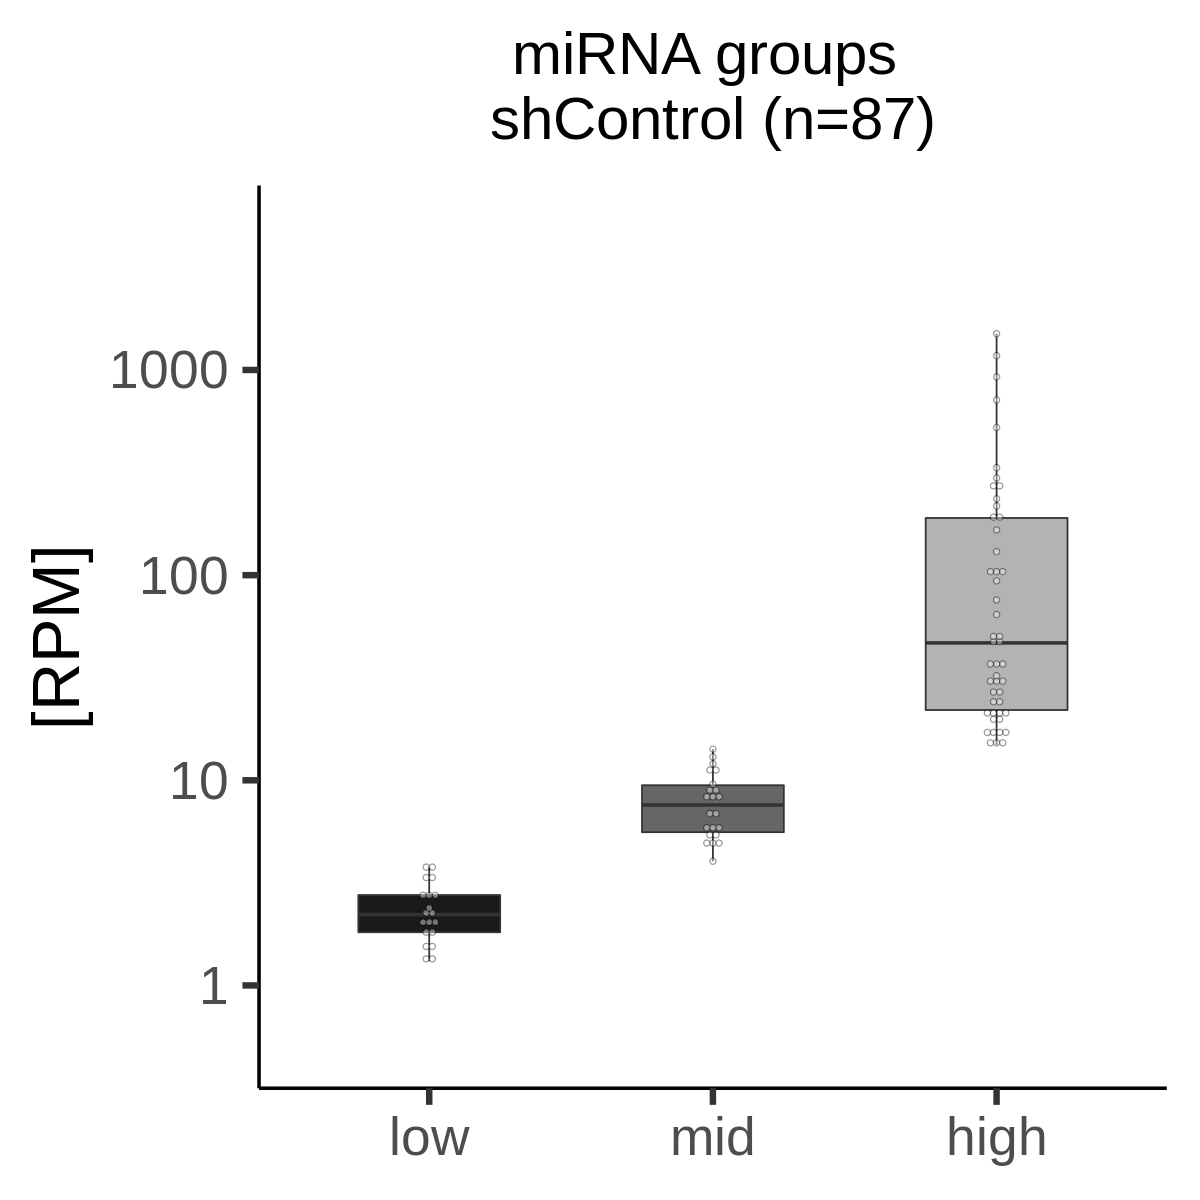

In [32]:
options(repr.plot.width=10, repr.plot.height=10)

plot.control.87 <- ggplot(data = gfp.87, aes(x = quartile, y = rpm.shControl)) +
        theme_bw(base_size = 40) +
        ggtitle("miRNA groups \nshControl (n=87)") +
        theme(plot.title = element_text(hjust = 0.5, size=36)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank(),
              legend.position = "none") +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text())+ #angle = 45, hjust = 1)) +
        scale_y_continuous(name="[RPM]", trans = "log10", limits=c(0.5, 5000))+#, breaks =seq(from =-8, to=3,by=1)) +
        scale_x_discrete(limits=c("low", "mid", "high")) +
        #geom_violin(alpha=0.2) +
        geom_boxplot(aes(fill=quartile),width = 0.5, outlier.color=NA) +
        geom_dotplot(binaxis="y", stackdir = "center", binwidth = .03, alpha=.4, fill="white") +
        #geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun=mean, geom="point", size = 3, color="red") +
        scale_fill_manual(values=c("grey70", "grey10", "grey40")) # limits orders colors as wanted!!! very useful!

plot.control.87
#ggsave(paste0(target.dir, "/boxplot_deseq2_ALL.pdf"),  width=16, height=10)

In [33]:
# Compute the analysis of variance
res.aov <- aov(rpm.shControl ~ quartile, data = gfp.87)
# Summary of the analysis
summary(res.aov) 


TukeyHSD(res.aov)

            Df  Sum Sq Mean Sq F value  Pr(>F)   
quartile     2  625906  312953   6.102 0.00331 **
Residuals   87 4461897   51286                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rpm.shControl ~ quartile, data = gfp.87)

$quartile
                diff       lwr       upr     p adj
low-high -170.410650 -316.3503 -24.47098 0.0178978
mid-high -164.813891 -303.3980 -26.22975 0.0155364
mid-low     5.596758 -163.5242 174.71776 0.9965730


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_bindot).”


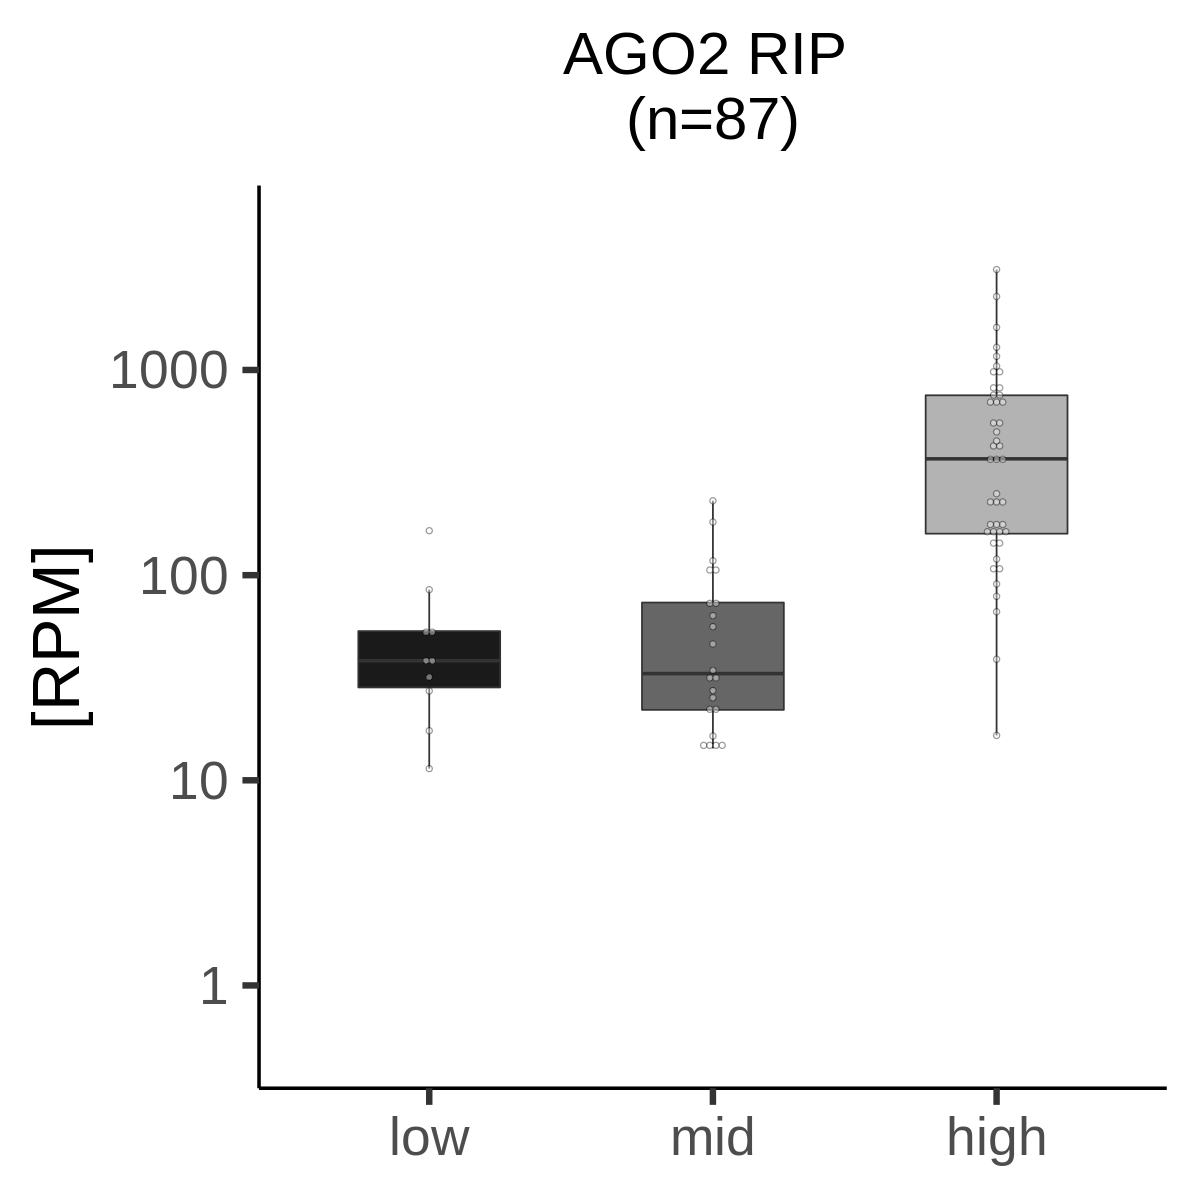

In [34]:
options(repr.plot.width=10, repr.plot.height=10)

plot.ago.87 <- ggplot(data = ago2.87, aes(x = quartile, y = rpm)) +
        theme_bw(base_size = 40) +
        ggtitle("AGO2 RIP \n(n=87)") +
        theme(plot.title = element_text(hjust = 0.5, size=36)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank(),
              legend.position = "none") +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text())+ #angle = 45, hjust = 1)) +
        scale_y_continuous(name="[RPM]", trans = "log10", limits=c(0.5,5000))+#, breaks =seq(from =-8, to=3,by=1)) +
        scale_x_discrete(limits=c("low", "mid", "high")) +
        #geom_violin(alpha=0.2) +
        geom_boxplot(aes(fill=quartile),width = 0.5, outlier.color=NA) +
        geom_dotplot(binaxis="y", stackdir = "center", binwidth = .03, alpha=.4, fill="white") +
        #geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun=mean, geom="point", size = 3, color="red") +
        scale_fill_manual(values=c("grey70", "grey10", "grey40")) # limits orders colors as wanted!!! very useful!

plot.ago.87
#ggsave(paste0(target.dir, "/boxplot_deseq2_ALL.pdf"),  width=16, height=10)

In [35]:
# Compute the analysis of variance
res.aov <- aov(rpm ~ quartile, data = ago2.87)
# Summary of the analysis
summary(res.aov) 


TukeyHSD(res.aov)

            Df    Sum Sq Mean Sq F value Pr(>F)  
quartile     2  11555368 5777684   4.054 0.0212 *
Residuals   76 108317676 1425233                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rpm ~ quartile, data = ago2.87)

$quartile
                diff       lwr        upr     p adj
low-high -784.687586 -1778.527  209.15227 0.1492962
mid-high -776.507151 -1513.719  -39.29551 0.0366412
mid-low     8.180435 -1080.227 1096.58802 0.9998220


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_bindot).”


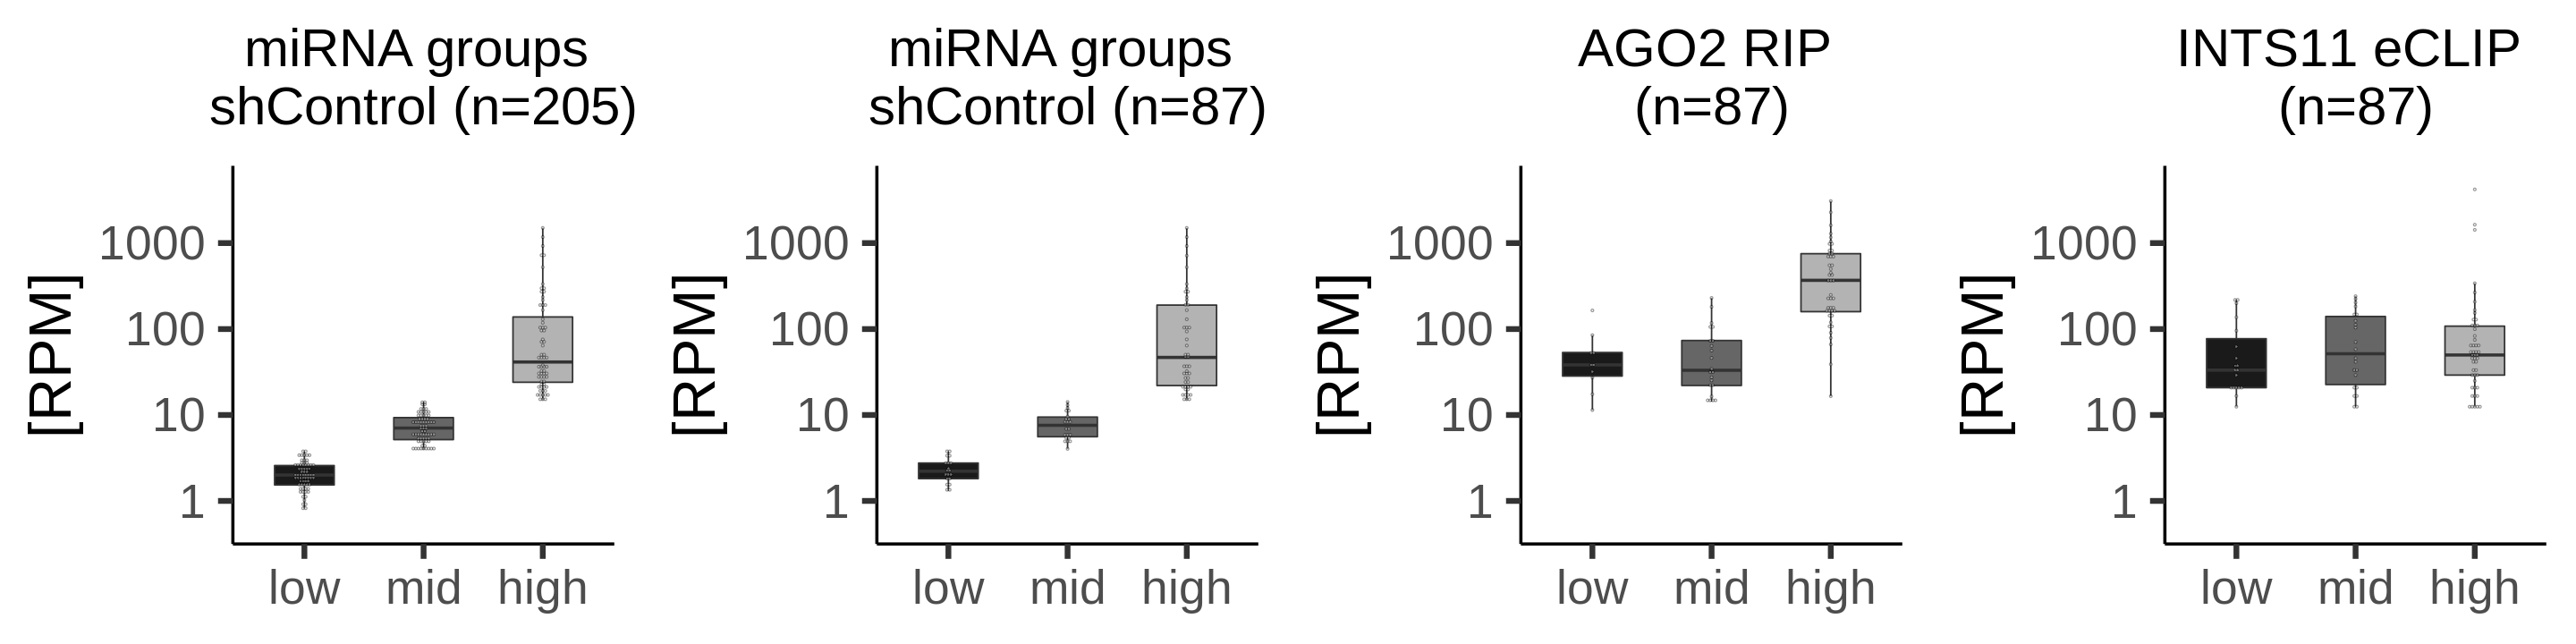

In [36]:
options(repr.plot.width=24, repr.plot.height=6)
plot_grid(plot.control, plot.control.87, plot.ago.87, plot.eclip, ncol=4, rel_widths =c(1,1))
#ggsave("boxplot_87_mirnas_eclip_mirna_quantiles_rpm.pdf",  width=24, height=6)

# separate for guide and passenger

In [37]:
type <- read.delim("96_miRNA_active_star_shgfp.csv", header=TRUE)[,c(1,3)] # file provided in github
colnames(type) <- c("miRNA", "type")
type$type <- gsub("active", "guide", type$type)
type$type <- gsub("star", "passenger", type$type)
head(type, n=2)
nrow(type)

,miRNA,type
,<chr>,<chr>
2,hsa-let-7a-5p,guide
3,hsa-let-7a-3p,passenger


[1] 96

In [38]:
head(ints11.rpm)
nrow(ints11.rpm)

miRNA,n,rpm,rpm.shControl,sample,quartile
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>
hsa-miR-27a-3p,1014,4215.4976,29.785,INTS11,high
hsa-miR-23a-3p,394,1637.9744,925.265,INTS11,high
hsa-miR-21-5p,343,1425.9523,102.350,INTS11,high
hsa-let-7i-5p,82,340.8982,273.850,INTS11,high
hsa-let-7b-5p,64,266.0669,524.050,INTS11,high
hsa-miR-186-5p,58,241.1231,13.000,INTS11,mid


[1] 90

In [39]:
ints11.rpm.type <- ints11.rpm %>%
    left_join(type) %>%
    filter(complete.cases(type))

head(ints11.rpm.type)
nrow(ints11.rpm.type)

mirna.list <- ints11.rpm.type$miRNA

ago2.rpm.type <- ago2.rpm %>%
    left_join(type) %>%
    filter(complete.cases(type))

ago2.rpm.type <- ago2.rpm.type[ago2.rpm.type$miRNA %in% mirna.list,]

head(ago2.rpm.type)
nrow(ago2.rpm.type)

Joining, by = "miRNA"



miRNA,n,rpm,rpm.shControl,sample,quartile,type
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
hsa-miR-27a-3p,1014,4215.4976,29.785,INTS11,high,guide
hsa-miR-23a-3p,394,1637.9744,925.265,INTS11,high,guide
hsa-miR-21-5p,343,1425.9523,102.350,INTS11,high,guide
hsa-let-7i-5p,82,340.8982,273.850,INTS11,high,guide
hsa-let-7b-5p,64,266.0669,524.050,INTS11,high,guide
hsa-miR-20a-5p,54,224.4940,4.800,INTS11,mid,guide


[1] 47

Joining, by = "miRNA"



miRNA,n,rpm,rpm.shControl,sample,quartile,type
<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
hsa-miR-23a-3p,79216,8853.850,925.265,Ago2,high,guide
hsa-miR-25-3p,51465,5752.164,713.900,Ago2,high,guide
hsa-let-7b-5p,27618,3086.821,524.050,Ago2,high,guide
hsa-miR-21-5p,20406,2280.747,102.350,Ago2,high,guide
hsa-miR-93-5p,14425,1612.260,217.100,Ago2,high,guide
hsa-miR-125a-5p,9344,1044.364,75.730,Ago2,high,guide


[1] 43

In [40]:
head(to5)
control.type <- to5 %>%
    left_join(type) %>%
    filter(complete.cases(type))
head(control.type)
nrow(control.type)


,rpm.shControl,miRNA,quartile
,<dbl>,<chr>,<chr>
1,1503.250,hsa-let-7a-5p,high
2,10.200,hsa-let-7a-3p,mid
3,524.050,hsa-let-7b-5p,high
4,4.350,hsa-let-7b-3p,mid
5,189.980,hsa-let-7c-5p,high
6,297.585,hsa-let-7d-5p,high


Joining, by = "miRNA"



,rpm.shControl,miRNA,quartile,type
,<dbl>,<chr>,<chr>,<chr>
1,1503.250,hsa-let-7a-5p,high,guide
2,10.200,hsa-let-7a-3p,mid,passenger
3,524.050,hsa-let-7b-5p,high,guide
4,4.350,hsa-let-7b-3p,mid,passenger
5,297.585,hsa-let-7d-5p,high,guide
6,32.315,hsa-let-7d-3p,high,passenger


[1] 92

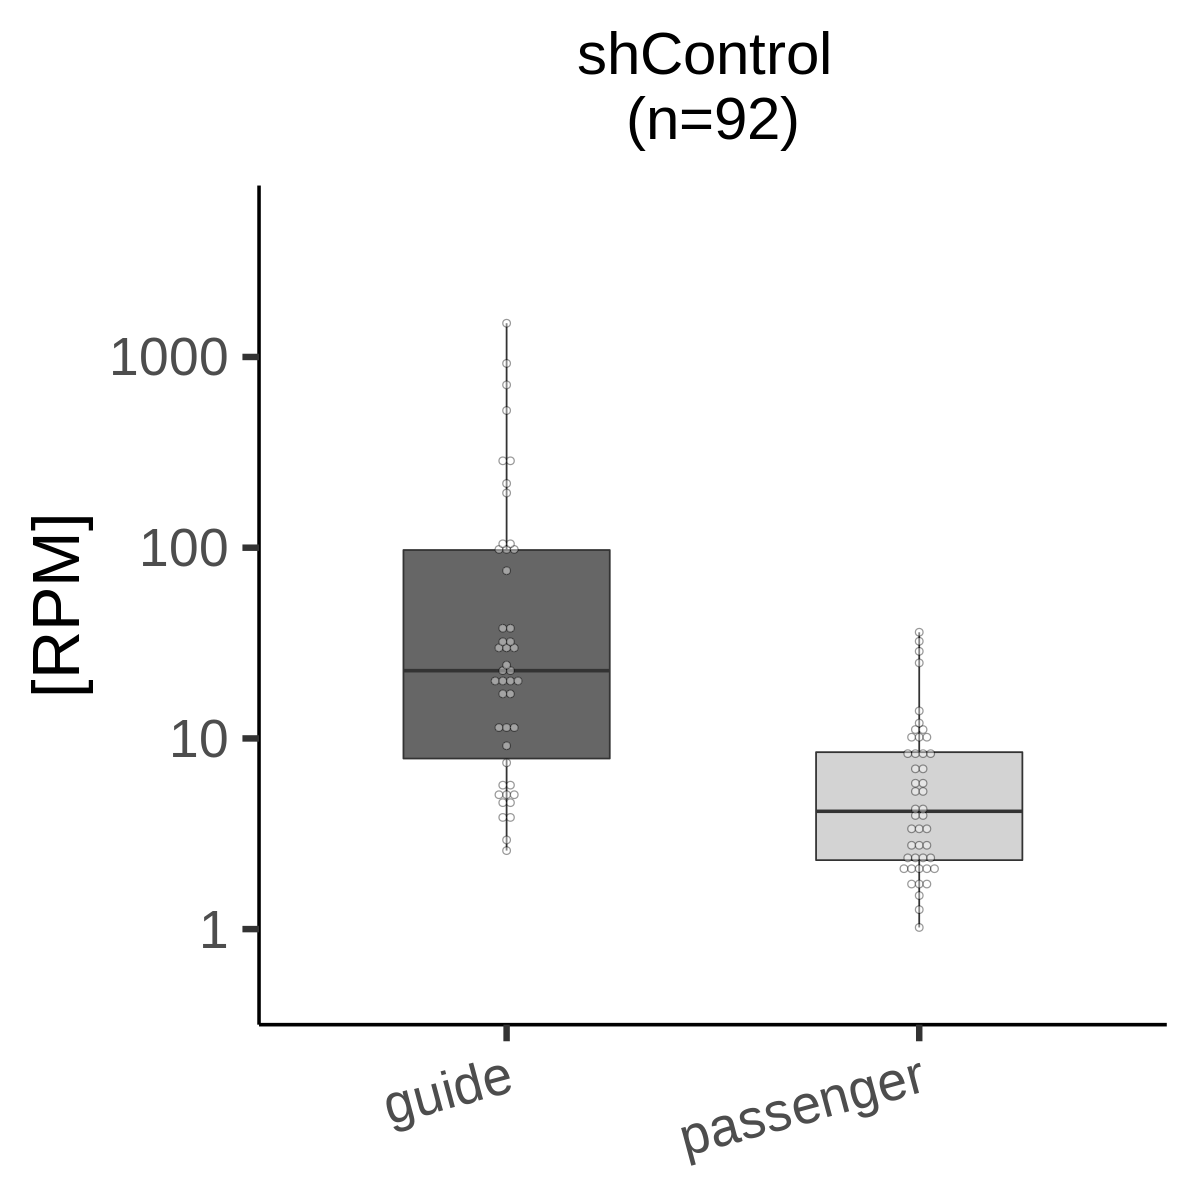

In [41]:
options(repr.plot.width=10, repr.plot.height=10)

type.control.92 <- ggplot(data = control.type, aes(x = type, y = rpm.shControl)) +
        theme_bw(base_size = 40) +
        ggtitle("shControl \n(n=92)") +
        theme(plot.title = element_text(hjust = 0.5, size=36)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank(),
             legend.position = "none") +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text(angle = 15, hjust = 1)) +
        scale_y_continuous(name="[RPM]", trans = "log10", limits=c(0.5,5000))+#, breaks =seq(from =-8, to=3,by=1)) +
        #geom_violin(alpha=0.2) +
        geom_boxplot(aes(fill=type),width = 0.5, outlier.color=NA) +
        geom_dotplot(binaxis="y", stackdir = "center", binwidth = .04, alpha=.4, fill="white") +
        #geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun=mean, geom="point", size = 3, color="red") +
        scale_fill_manual(values=c("grey40", "lightgrey")) # limits orders colors as wanted!!! very useful!

type.control.92
#ggsave(paste0(target.dir, "/boxplot_deseq2_ALL.pdf"),  width=16, height=10)

In [42]:
t.test(rpm.shControl ~type, data=control.type)


	Welch Two Sample t-test

data:  rpm.shControl by type
t = 2.8584, df = 45.076, p-value = 0.006426
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  34.7354 200.4437
sample estimates:
    mean in group guide mean in group passenger 
             124.831957                7.242391 


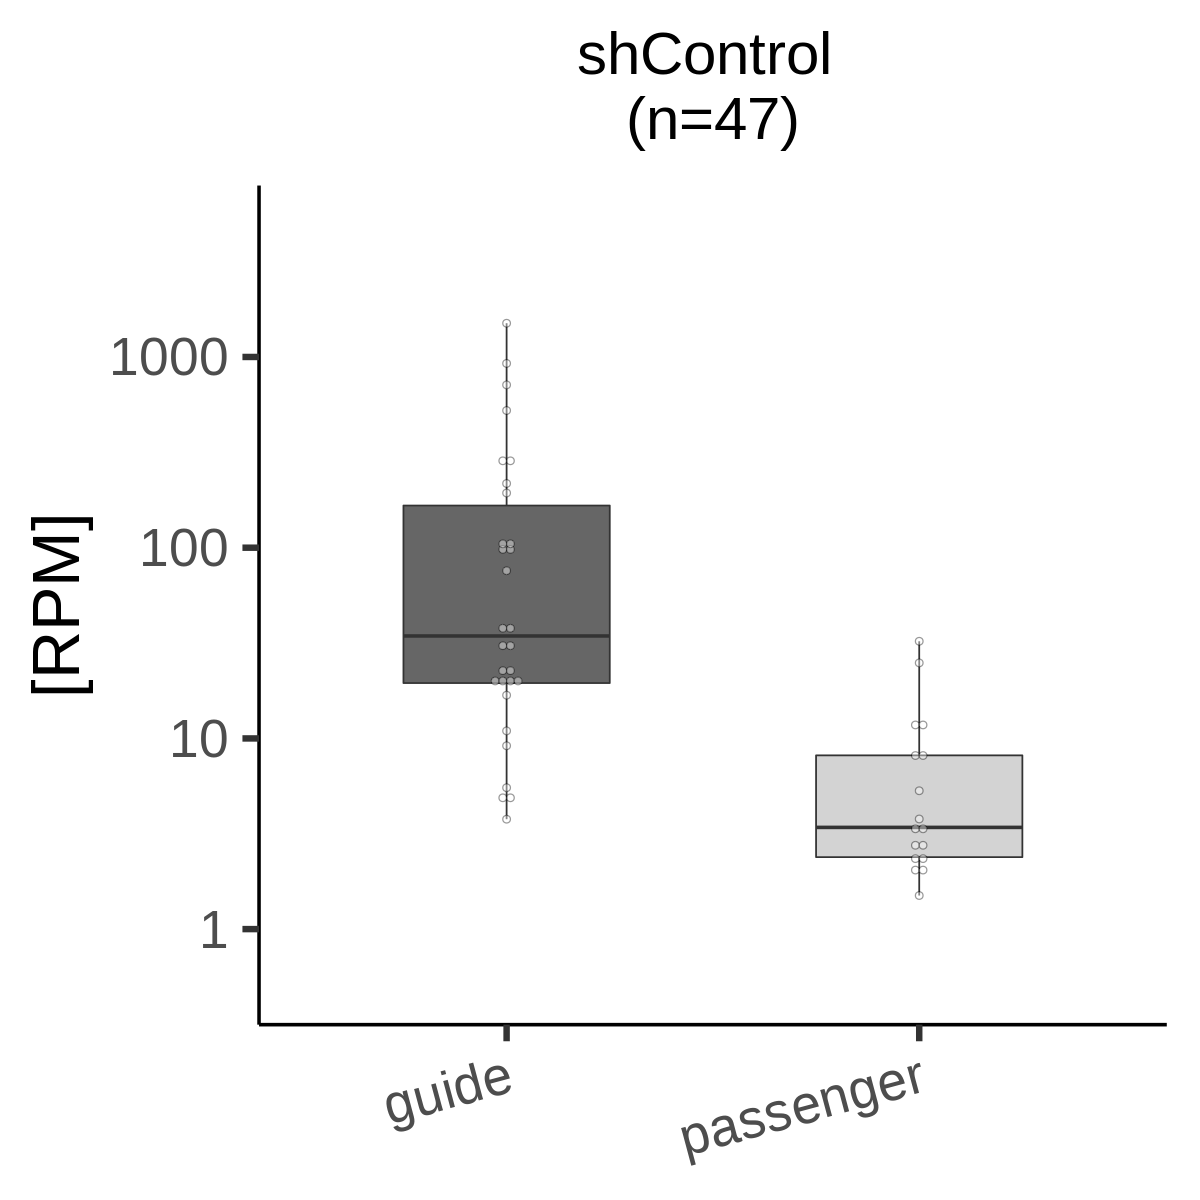

In [43]:
options(repr.plot.width=10, repr.plot.height=10)

type.control <- ggplot(data = ints11.rpm.type, aes(x = type, y = rpm.shControl)) +
        theme_bw(base_size = 40) +
        ggtitle("shControl \n(n=47)") +
        theme(plot.title = element_text(hjust = 0.5, size=36)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank(),
             legend.position = "none") +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text(angle = 15, hjust = 1)) +
        scale_y_continuous(name="[RPM]", trans = "log10", limits=c(0.5,5000))+#, breaks =seq(from =-8, to=3,by=1)) +
        #geom_violin(alpha=0.2) +
        geom_boxplot(aes(fill=type),width = 0.5, outlier.color=NA) +
        geom_dotplot(binaxis="y", stackdir = "center", binwidth = .04, alpha=.4, fill="white") +
        #geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun=mean, geom="point", size = 3, color="red") +
        scale_fill_manual(values=c("grey40", "lightgrey")) # limits orders colors as wanted!!! very useful!

type.control
#ggsave(paste0(target.dir, "/boxplot_deseq2_ALL.pdf"),  width=16, height=10)

In [44]:
t.test(rpm.shControl ~type, data=ints11.rpm.type)


	Welch Two Sample t-test

data:  rpm.shControl by type
t = 2.8627, df = 29.069, p-value = 0.007714
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  49.72194 298.44200
sample estimates:
    mean in group guide mean in group passenger 
             181.645500                7.563529 


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_bindot).”


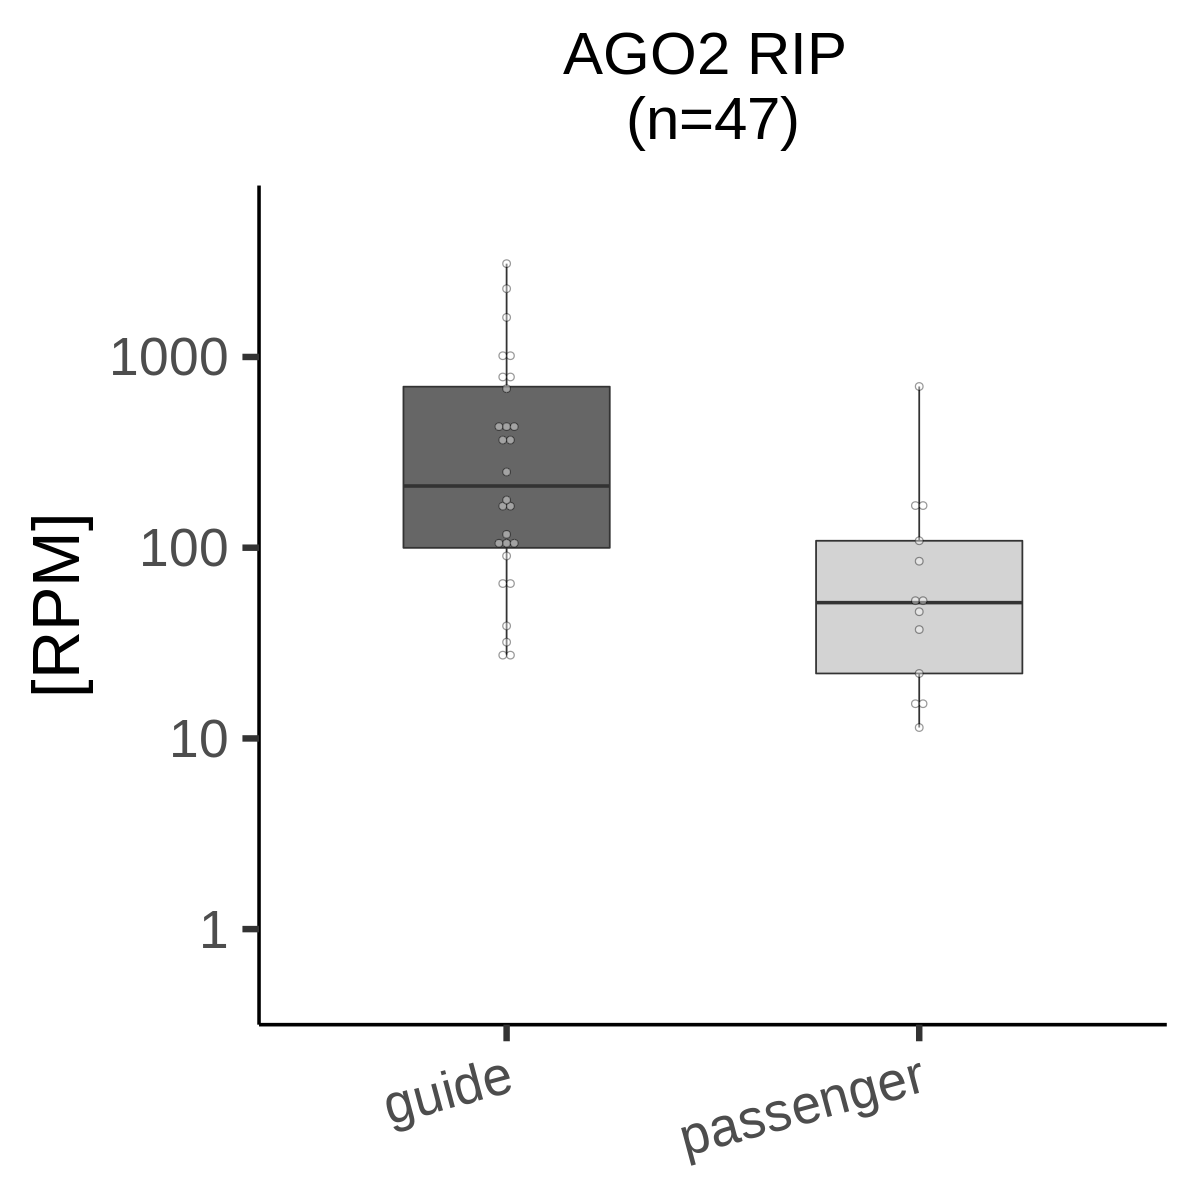

In [47]:
options(repr.plot.width=10, repr.plot.height=10)

type.ago <- ggplot(data = ago2.rpm.type, aes(x = type, y = rpm)) +
        theme_bw(base_size = 40) +
        ggtitle("AGO2 RIP \n(n=47)") +
        theme(plot.title = element_text(hjust = 0.5, size=36)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank(),
             legend.position = "none") +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text(angle = 15, hjust = 1)) +
        scale_y_continuous(name="[RPM]", trans = "log10", limits=c(0.5,5000))+#, breaks =seq(from =-8, to=3,by=1)) +
        #geom_violin(alpha=0.2) +
        geom_boxplot(aes(fill=type),width = 0.5, outlier.color=NA) +
        geom_dotplot(binaxis="y", stackdir = "center", binwidth = .04, alpha=.4, fill="white") +
        #geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun=mean, geom="point", size = 3, color="red") +
        scale_fill_manual(values=c("grey40", "lightgrey")) # limits orders colors as wanted!!! very useful!

type.ago
#ggsave(paste0(target.dir, "/boxplot_deseq2_ALL.pdf"),  width=16, height=10)

In [82]:
t.test(rpm ~type, data=ago2.rpm.type)


	Welch Two Sample t-test

data:  rpm by type
t = 2.4746, df = 30.236, p-value = 0.01917
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  151.8528 1583.7704
sample estimates:
    mean in group guide mean in group passenger 
               981.6177                113.8061 


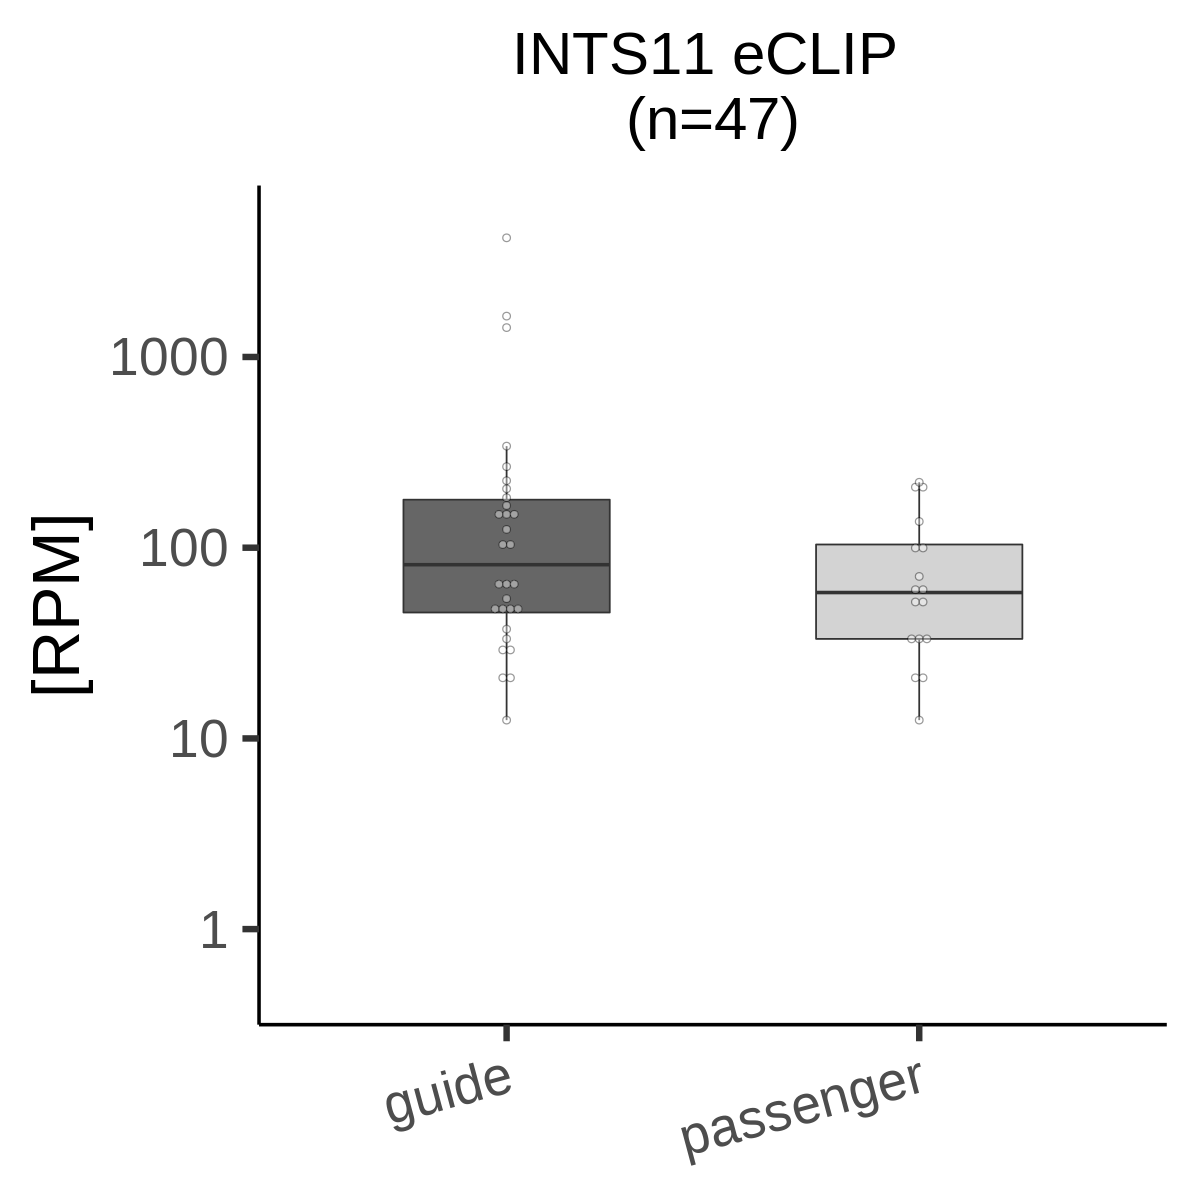

In [45]:
options(repr.plot.width=10, repr.plot.height=10)

type.eclip <- ggplot(data = ints11.rpm.type, aes(x = type, y = rpm)) +
        theme_bw(base_size = 40) +
        ggtitle("INTS11 eCLIP \n(n=47)") +
        theme(plot.title = element_text(hjust = 0.5, size=36)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank(),
             legend.position = "none") +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text(angle = 15, hjust = 1)) +
        scale_y_continuous(name="[RPM]", trans = "log10", limits=c(0.5,5000))+#, breaks =seq(from =-8, to=3,by=1)) +
        #geom_violin(alpha=0.2) +
        geom_boxplot(aes(fill=type),width = 0.5, outlier.color=NA) +
        geom_dotplot(binaxis="y", stackdir = "center", binwidth = .04, alpha=.4, fill="white") +
        #geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun=mean, geom="point", size = 3, color="red") +
        scale_fill_manual(values=c("grey40", "lightgrey")) # limits orders colors as wanted!!! very useful!

type.eclip
#ggsave(paste0(target.dir, "/boxplot_deseq2_ALL.pdf"),  width=16, height=10)

In [46]:
t.test(rpm ~type, data=ints11.rpm.type)


	Welch Two Sample t-test

data:  rpm by type
t = 1.6682, df = 29.725, p-value = 0.1058
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -56.59197 560.30945
sample estimates:
    mean in group guide mean in group passenger 
               335.4937                 83.6350 


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_bindot).”


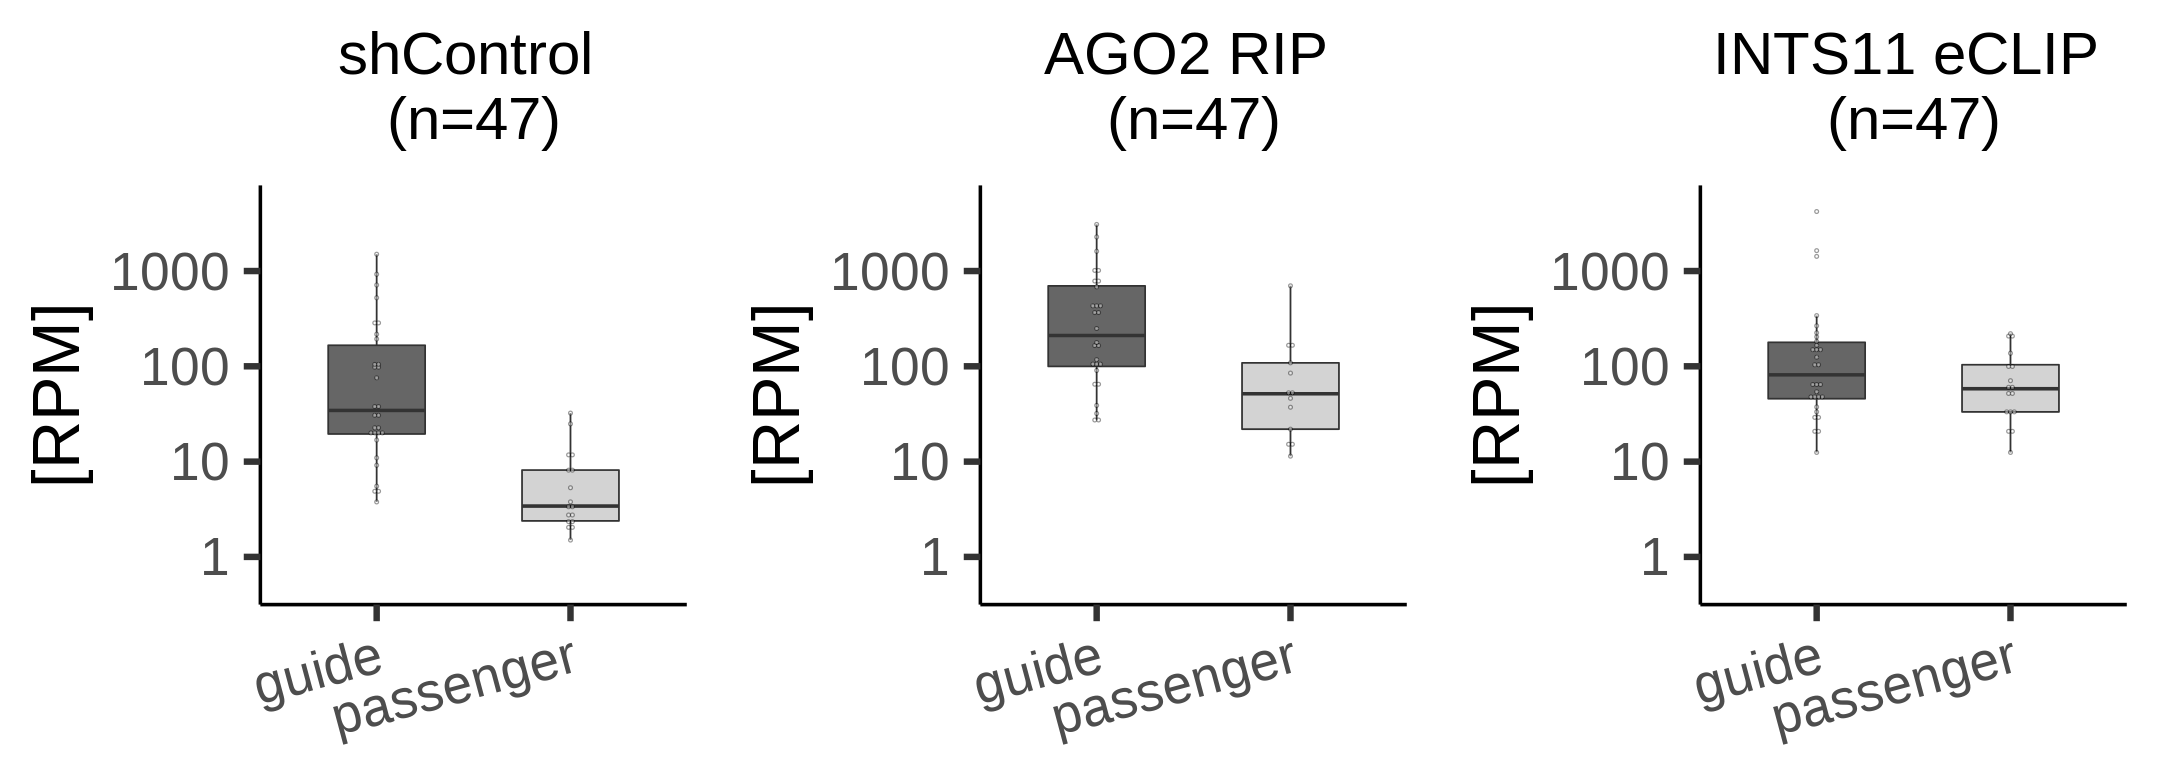

In [48]:
options(repr.plot.width=18, repr.plot.height=6.5)
plot_grid(type.control, type.ago, type.eclip, ncol=3, rel_widths =c(1,1))
#ggsave("boxplot_eclip_mirna_type.pdf",  width=18, height=6.5)

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_bindot).”


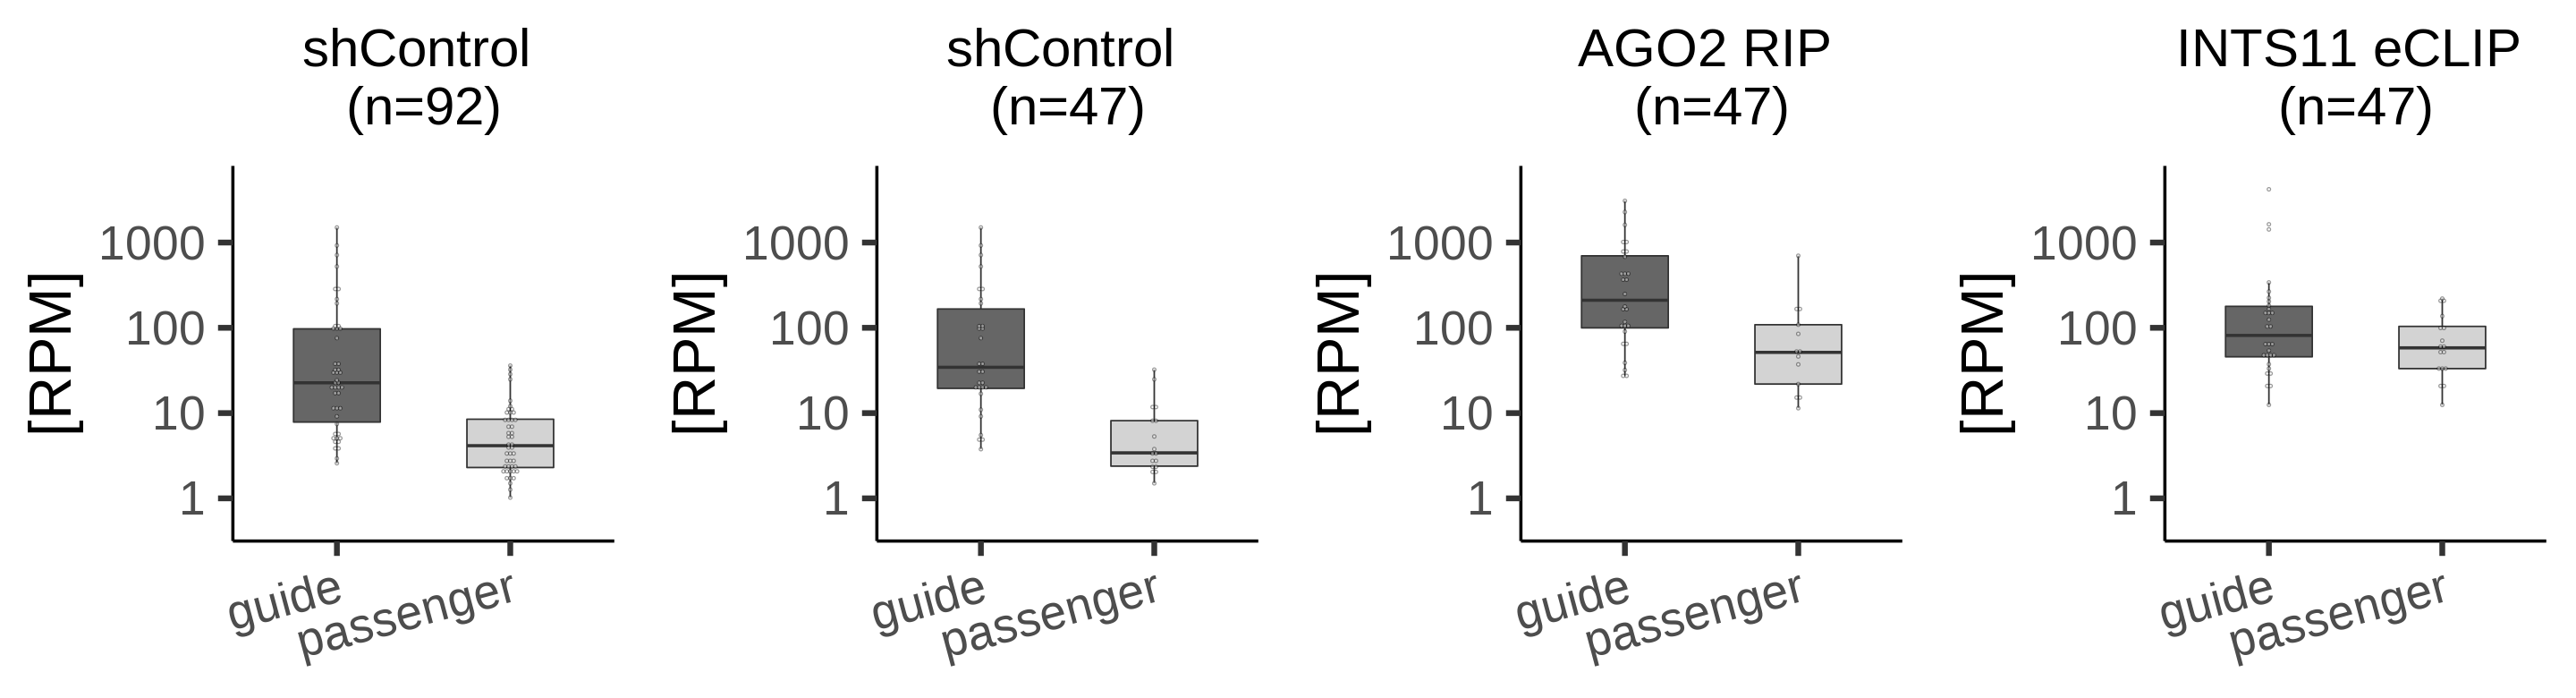

In [49]:
options(repr.plot.width=24, repr.plot.height=6.5)
plot_grid(type.control.92, type.control, type.ago, type.eclip, ncol=4, rel_widths =c(1,1))
#ggsave("boxplot_4col_eclip_mirna_type.pdf",  width=24, height=6.5)